<a href="https://www.kaggle.com/code/pamelakinga/complete-data-science-with-iris-data?scriptVersionId=113162699" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from platform import python_version
print("Current Python Version-", python_version())

Current Python Version- 3.7.12


This notebook explores the Iris Dataset

**Contents**
1. Import Libraries
2. Preview Data
3. EDA & Data Visualization
4. Machine Learning & Modelling
5. PCA
6. KNN
7. Decision Tree Classifier

# The Iris Dataset 🌺
### ➡️ Classify iris plants into three species

A little domain knowledge to help the user: This dataset contains information about the Iris plant species. Iris is a flowering plant that is popular in gardens and comes in a variety of colors, most commonly yellow and purple. In Greek mythology, Iris was the Greek goddess of the rainbow and messenger to the Gods. The goal of this dataset is to classify Iris plant - using data of observed characteristics - into one of its three recorded species.

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
%matplotlib inline
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import warnings

In [3]:
# Read data into a dataframe
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

## Preview dataset

Review the data, check for nulls, shape, data types, and basic statistics.

In [4]:
# Preview data, default first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# There are 150 rows and 6 columns in the Iris Dataset
df.shape

(150, 6)

In [7]:
# Basic statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
# How many species of Iris are in the dataset?
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

----

## ➡️ EDA & Data Visualization

There are sixe variables in total in the data set. The target variable is 'Species'; this is what we are classifying. There is also the variable 'ID' to give a unique identifier per record. The remaining variables are the characteristics available for classification. They are:

🪴 The Sepal - The inner leaves of the flower head, usually green
- Sepal Length (cm)
- Sepal Widgth (cm)

🌺 The Petal - The colorful leaves of the flower head
- Petal Length (cm)
- Petal Widgth (cm)

We will visualize these variables to see what relationships or patterns emerge.

### Create a boxplot to visually analyze the spread of Iris characteristic per species

Using Matplotlib and Seaborn packages, compute the boxplots.

In [9]:
# Before creating boxplots, define a variable to compute the boxplot median values and plot them 

def add_median_labels(ax, fmt='.1f'):
    lines = ax.get_lines()
    boxes = [c for c in ax.get_children() if type(c).__name__ == 'PathPatch']
    lines_per_box = int(len(lines) / len(boxes))
    for median in lines[4:len(lines):lines_per_box]:
        x, y = (data.mean() for data in median.get_data())
        # choose value depending on horizontal or vertical plot orientation
        value = x if (median.get_xdata()[1] - median.get_xdata()[0]) == 0 else y
        text = ax.text(x, y, f'{value:{fmt}}', ha='center', va='center',
                       fontweight='bold', color='white')
        # create median-colored border around white text for contrast
        text.set_path_effects([
            path_effects.Stroke(linewidth=3, foreground=median.get_color()),
            path_effects.Normal(),
        ])

### Box Plots

I think boxplots will be a great visualization technique to measure the spread of the petal and sepal lengths per species of Iris. It will allow me to see if there is any discernable difference. I will also show the median value and plot this on the chart as a reference.

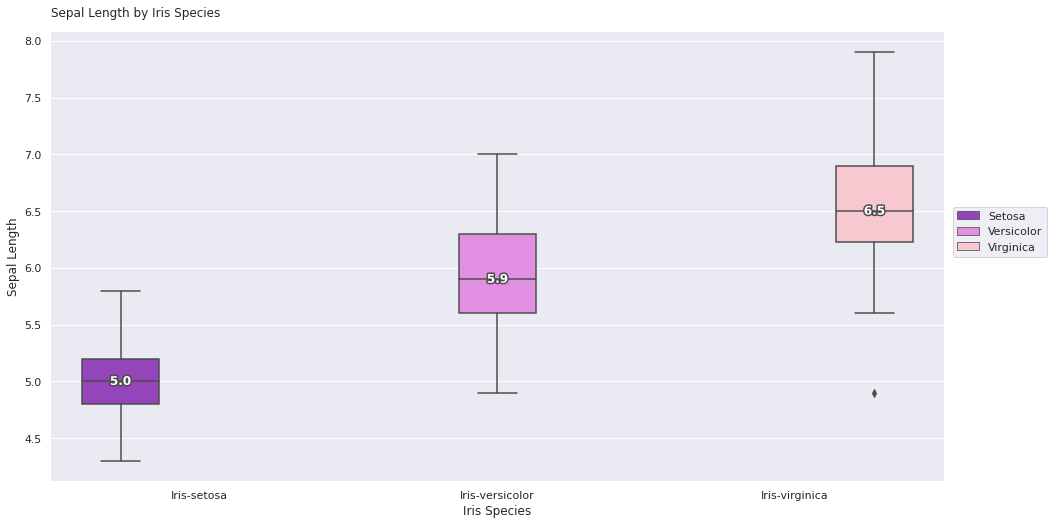

In [10]:
# Create a boxplot of sepal length by species
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(data = df, x = 'Species', y = 'SepalLengthCm', hue = 'Species', palette=['darkorchid', 'violet','pink'])

# Set Title
ax.set_title('Sepal Length by Iris Species', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Iris Species')
ax.set_ylabel(ylabel='Sepal Length')

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor','Virginica'], loc=(1.01,0.5));

add_median_labels(ax)

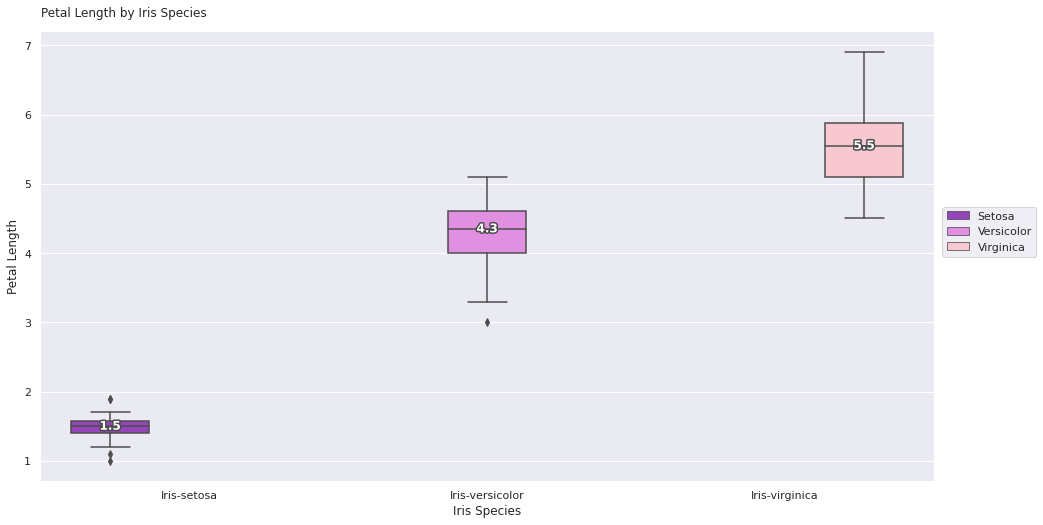

In [11]:
# Create a boxplot of petal length by species
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.boxplot(data = df, x = 'Species', y = 'PetalLengthCm', hue = 'Species', palette=['darkorchid', 'violet','pink'])

# Set Title
ax.set_title('Petal Length by Iris Species', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Iris Species')
ax.set_ylabel(ylabel='Petal Length')

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor','Virginica'], loc=(1.01,0.5));

add_median_labels(ax)

It shows above that both petals and sepals share their spread between the species.

The species Iris-Setosa is on average much smaller than the species Iris-Virgina, with Iris-Versicolor in between the two.

### Violin Plots
To analyze the sepal and petal width, I'll use a violin plot. A violin plot is a hybrid of a box plot and a kernel density plot, which shows peaks in the data. It is used to visualize the distribution of numerical data. I will flip the graph slightly by putting the numerical variable on the x axis, to make it a little easier to highlight the width of the petal/sepal by species. Where the violin is more dense (given by the height in the below charts) indicates a higher frequency of records sharing that numeric characteristic.

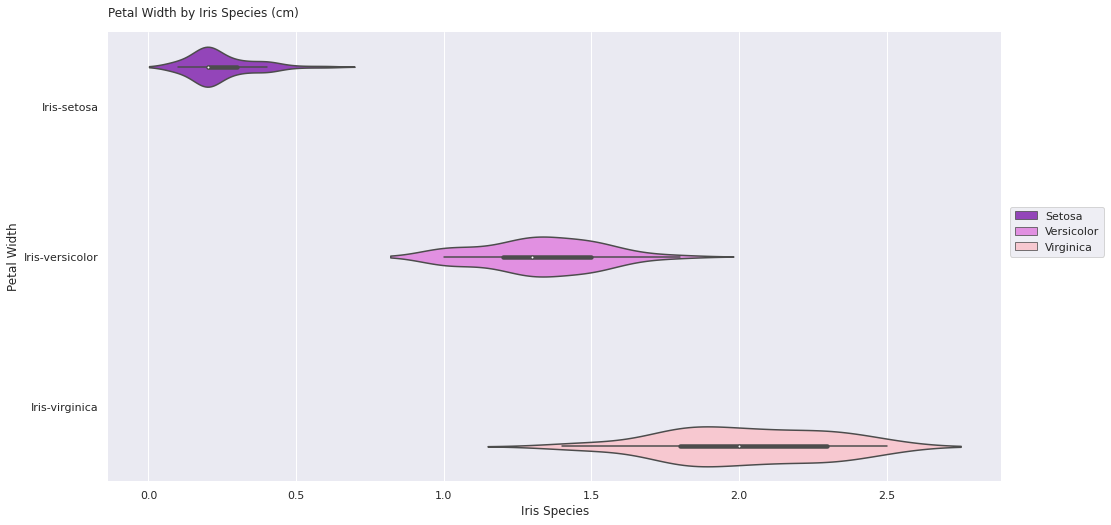

In [12]:
# Create a boxplot of petal width by species
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.violinplot(data = df, x = 'PetalWidthCm', y = 'Species', hue = 'Species', palette=['darkorchid', 'violet','pink'])

# Set Title
ax.set_title('Petal Width by Iris Species (cm)', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Iris Species')
ax.set_ylabel(ylabel='Petal Width')

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor','Virginica'], loc=(1.01,0.5));


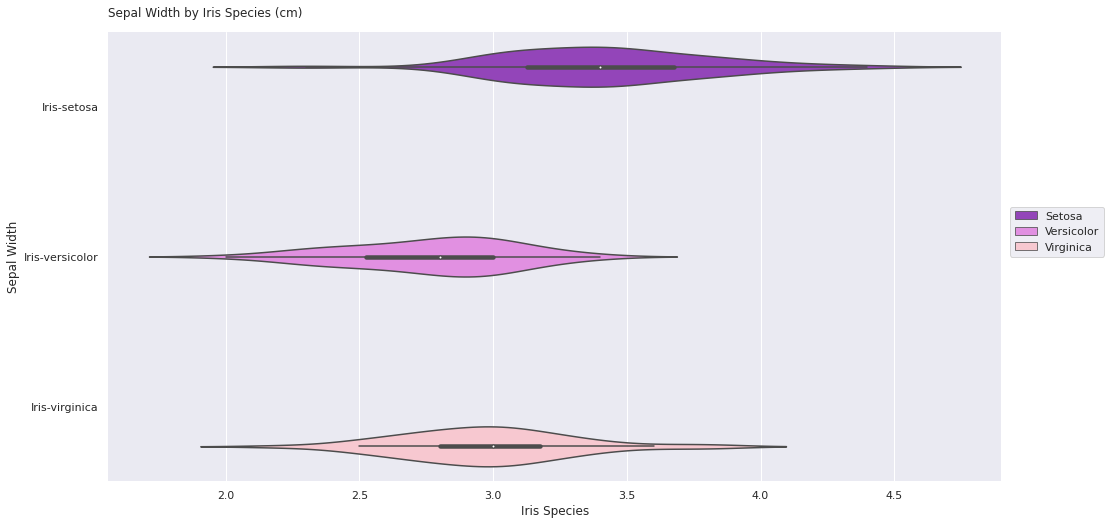

In [13]:
# Create a boxplot of sepal width by species
sns.set(rc={'figure.figsize':(16,8.27)})
ax = sns.violinplot(data = df, x = 'SepalWidthCm', y = 'Species', hue = 'Species', palette=['darkorchid', 'violet','pink'])

# Set Title
ax.set_title('Sepal Width by Iris Species (cm)', loc='left', pad=15)

# Set spines (optional)
sns.despine(top=True, right=True, left=True, bottom=True)

# Set axis titles
ax.set_xlabel(xlabel='Iris Species')
ax.set_ylabel(ylabel='Sepal Width')

# Format legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Setosa', 'Versicolor','Virginica'], loc=(1.01,0.5));

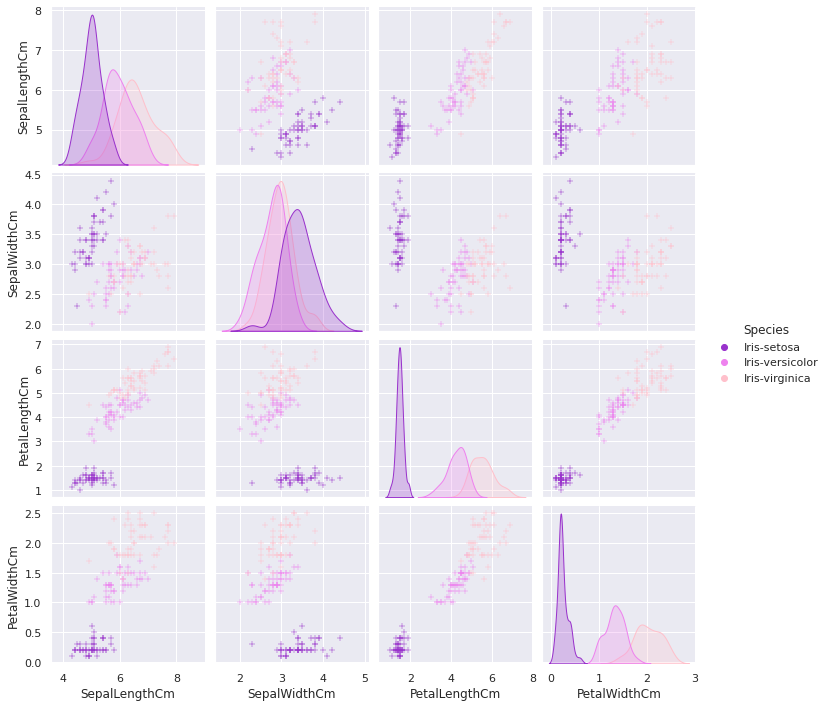

In [14]:
# Drop the column ID for pairplot visuals
temp = df.drop('Id', axis=1)
#Pair plots of data frame columns
g = sns.pairplot(temp, hue= 'Species', palette=['darkorchid', 'violet','pink'], markers='+')
plt.show()

### So what do these visualizations tell us?
So far these diagrams suggest that the Iris-Setosa species is the smaller of the three species by petal and sepal length.

Iris-Setosa
- Smallest petal length and petal width  
- Has the widest sepal widths but still among the shortest sepal length
- Dominant trait is the sepal width as this is distinctly wider than the others

Iris-Virginica
- Has the largest petals in both width and length
- Also has the longest sepals, but the sepal width is roughly equal to that of the average Iris-versicolor
- Dominant trait is the length of its sepals and petals 

Iris-Versicolor
- Is the "middle of the pack" for size and length of its sepals and petals
- Without any other data, its hard to say if there are any dominant traits that help to stand out the Versicolor species
- An idea is the collect color data as this may be of help

-----

## ➡️ Machine Learning & Modeling

### Correlation

Before setting up and training an algorithm, the number of features and their correlation plays an important role.

I'll plot a heatmap to show the correlations between the variables.

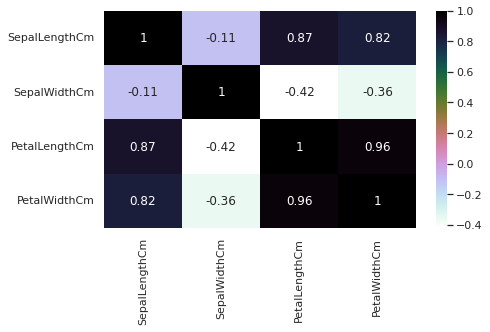

In [15]:
### Correlation 
# temp is the df I created excluding the 'ID' column which is unnecessary
plt.figure(figsize=(7,4)) 
sns.heatmap(temp.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(temp.corr())
plt.show()

Petal length and sepal length are most positively correlated. Sepal width and petal width/petal length are less correlated, and negatively. Sepal length and sepal width are very loosely and negatively correlated.

### Define the target variable (y) and feature set (X)

In [16]:
# df.iloc[row, column]
# Subsetting the data frame to drop the first column which is 'class' the target variable
X = df.iloc[:, 1:5]
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
# df.iloc[row, column]
# Subsetting the data frame to drop the first column which is 'class' the target variable
y = df.iloc[:, 5:6]
y

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [18]:
#Alternative method for setting X and y
# X = df.drop["Species", axis =1]
# y = df.['Species']

### Split the dataset into a training set and a testing set

Pros
- By splitting the dataset pseudo-randomly into a two separate sets, we can train using one set and test using another.
- This ensures that we won't use the same observations in both sets.

Cons
- The accuracy score of the models depends on the observations in the testing set, which is determined by the seed of the pseudo-random number generator (random_state parameter). This means that accuracy scores can be different depending on what samples are in the training vs. testing dataset.
- This disadvantage can be countered using k-fold cross-validation.

In [19]:
# Four parameters returned from the train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print('Training Data')
print('Training feature set shape: ',(X_train.shape))
print('Training target shape: ',(y_train.shape))
print('Testing Data')
print('Testing feature shape: ',(X_test.shape))
print('Testing target shape: ',(y_test.shape))

Training Data
Training feature set shape:  (90, 4)
Training target shape:  (90, 1)
Testing Data
Testing feature shape:  (60, 4)
Testing target shape:  (60, 1)


## Machine Learning Algorithms

#### 1.Principal Components Analysis to select clusters
PCA retains all the important information. If the data exhibits clustering, this will be generally revealed after a PCA analysis: by retaining only the components with the highest variance, the clusters should be visible. 

Therefore, if I want to identify better clusters I can first use PCA to the data, then, apply the k-means algorithm to the pre-processed data.

In this exercise, this is a classic supervised learning classification problem because we are given the classes (Species) per observation. Additionally, this is a small set of data (n = 150), with fewer features than observations.

**Note:** It should be clear, in this data set there is no NEED to apply a dimensionality reduction technique. However, the k-mean clustering algorithm is typically slow and depends in the number of data points and features in your data set. In summary, it wouldn’t hurt to apply PCA before you apply a k-means algorithm.

#### Choosing the number of components
1. For PCA to work, I need to select a # of principal components for dimensionality reduction.
2. Don’t choose the number of components manually. Instead of that, use the option that allows you to set the variance of the input that is supposed to be explained by the generated components.
3. Remember to scale the data to the range between 0 and 1 before using PCA!
4. Typically, we want the explained variance to be between 95–99%
5. The principal components explain a part of the variance, using Scikit-learn, I can get the information about the explained variance and plot the cumulative variance.

In [20]:
# Scale / standardize the data to the range between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(X)

In [21]:
# I want the explained variance to be between 95–99%
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

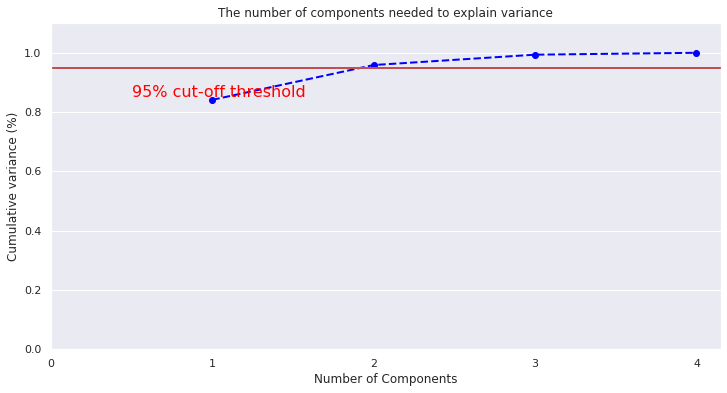

In [22]:
# Get the information about the explained variance and plot the cumulative variance.
pca = PCA().fit(data_rescaled)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 5, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='blue', linewidth=2)

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 5, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-', linewidth=2)
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

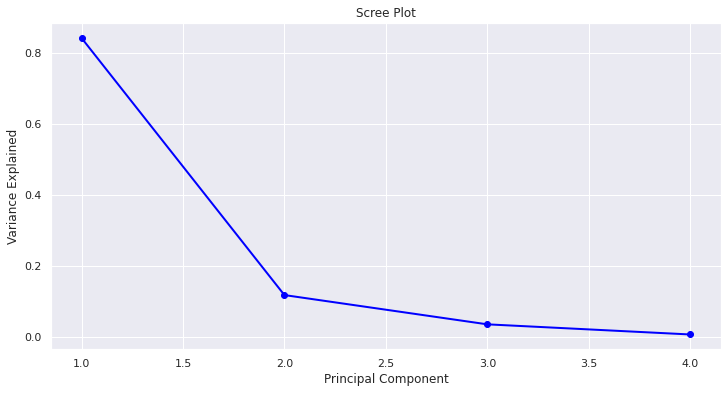

In [23]:
# Alternative: Create a Scree Plot The scree plot is used to determine the number of factors to retain
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [24]:
#Print the PCA values
print(pca.explained_variance_ratio_)

[0.84141901 0.11732474 0.03490564 0.00635061]


In [25]:
# I will use 2 components as shown in the 95% variance to setting the PCA
X_reduced = PCA(n_components=2).fit_transform(X)
print(f"X_reduced shape {X_reduced.shape}, first few entries: {X_reduced[:5]}")

X_reduced shape (150, 2), first few entries: [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]]


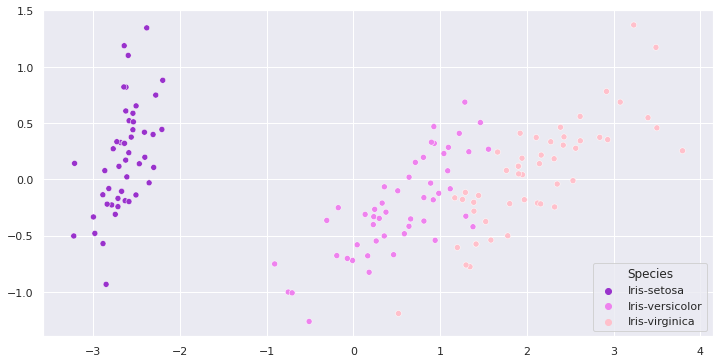

In [26]:
#Plot the PCA
sns.scatterplot(x=X_reduced[:,0], y=X_reduced[:,1], palette=['darkorchid', 'violet','pink'], hue = df['Species']);

Here there are two distinct clusters but we have three classes. The Iris-Setosa (Class 1) being clearly distinct, and the Iris-Versicolor (Class 2) and Iris-Virginica (Class 3) being less distinguished. AKA Class 1 is linearly separable from 2 and 3. Classes 2 and 3 are not linearly seperable. We could sort of see this relationship already in the EDA (Data Visualization) steps.

#### 2. K-nearest neighbour algorithm
The Iris dataset challenge is a basic classification exercise. Classification can be done with
many algorithms but the k-nearest neighbor is a common one. Also known as KNN or k-NN.

IBM:
> [KNN] is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. This assumption must be sufficiently accurate for the algorithm to be useful.

In [27]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression

knn=KNeighborsClassifier(n_neighbors=2) #this examines 2 neighbours for putting the new data into a class
knn.fit(X_train,y_train.values.ravel()) #DataConversionWarning error, .values will give the values in a numpy array (shape: (n,1)) , .ravel will convert that array shape to (n, ) (i.e. flatten it)
prediction=knn.predict(X_test)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,y_test))

The accuracy of the KNN is 0.9166666666666666


With the random-state seed set to 5, the accuracy of the KNN is 0.983 which is very high. It is highly likely that the random-state seed of 5 is partly responsible for such a high score. When changing the random state to 2 the accuracy score drops to 0.967, and a random-state seed = 8 has an accuracy score of 0.933. This is a demonstration of how the accuracy scores for the testing set can vary depending on what observations are in the set.

In [28]:
# make a prediction for an example of an out-of-sample observation
knn.predict([[2, 2, 5, 6]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array(['Iris-virginica'], dtype=object)

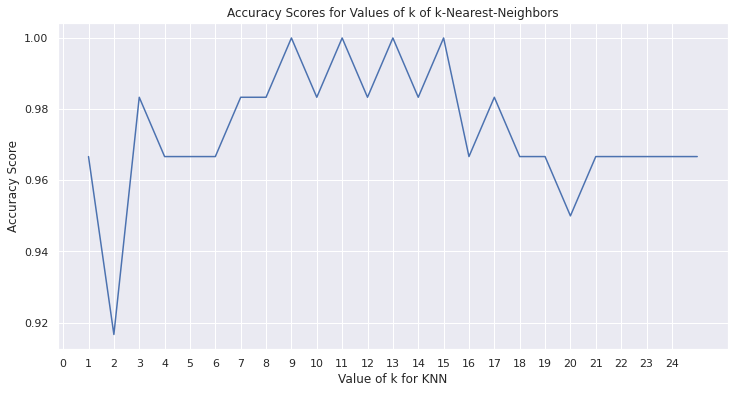

In [29]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel()) 
    #error: DataConversionWarning: A column-vector y was passed when a 1d array was expected
    #.values will give the values in a numpy array (shape: (n,1))
    #.ravel will convert that array shape to (n, ) (i.e. flatten it)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(np.arange(0, 25, step=1)) 
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

#### 3.Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import plot_tree

In [31]:
dtree = DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train, y_train)
train_predicitions = dtree.predict(X_train)

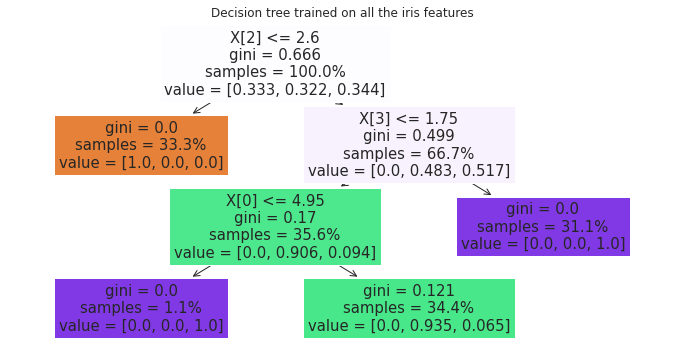

In [32]:
# fit the classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)
#plot tree requires import plot_tree for color effects
plot_tree(clf, filled=True, proportion=True) # display of ‘values’ be percentages.
plt.title("Decision tree trained on all the iris features")
plt.show()

In [33]:
# The score method returns the accuracy of the model
score = clf.score(X_test, y_test)
print(score)

0.9333333333333333


In [34]:
# Tune the model by pruning the tree: List of values to try for max_depth:
max_depth_range = list(range(1, 5))
# List to store the accuracy for each value of max_depth:
accuracy_tree = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy_tree.append(score)
    
print(accuracy_tree)

[0.65, 0.95, 0.9333333333333333, 0.95]
